## Gene Set Enrichment Analysis
We use this notebook to show that the small sample lymphocyte proteomics data is in fact representative of lymphocytes specifically.

In [1]:
import load_data
data = load_data.load_FragPipe(month="lymph_forPRIDE")
#Note that here, data does not need to
#    be normalized or subsectioned
#data=load_data.load_max_quant()

Here we use a function from load_data to get the names, both the gene name code and verbose headers. We then add these to the quantification data.

In [2]:
names = load_data.names_FragPipe(month="lymph_forPRIDE")
data['Names'] = names['Gene Names']
data['Header'] = names['Description']

Now we can run Gene Set Enrichment Analysis (GSEA) on the proteins identified.

In [3]:
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt

In [4]:
genesets = [
    'ProteomicsDB_2020',
    #if you want to try other genesets, simply add them here
    #'GO_Molecular_Function_2018',
    #'WikiPathways_2019_Human', 
]

We use the ProteomicsDB_2020 genesets, which compare our samples to documented lineages. The following plots show that the lymphocytes we measured are highly similar to several lymphoblastoid cell lines. Bones share a similarity as well, due to their role in producing blood cells.

ProteomicsDB_2020


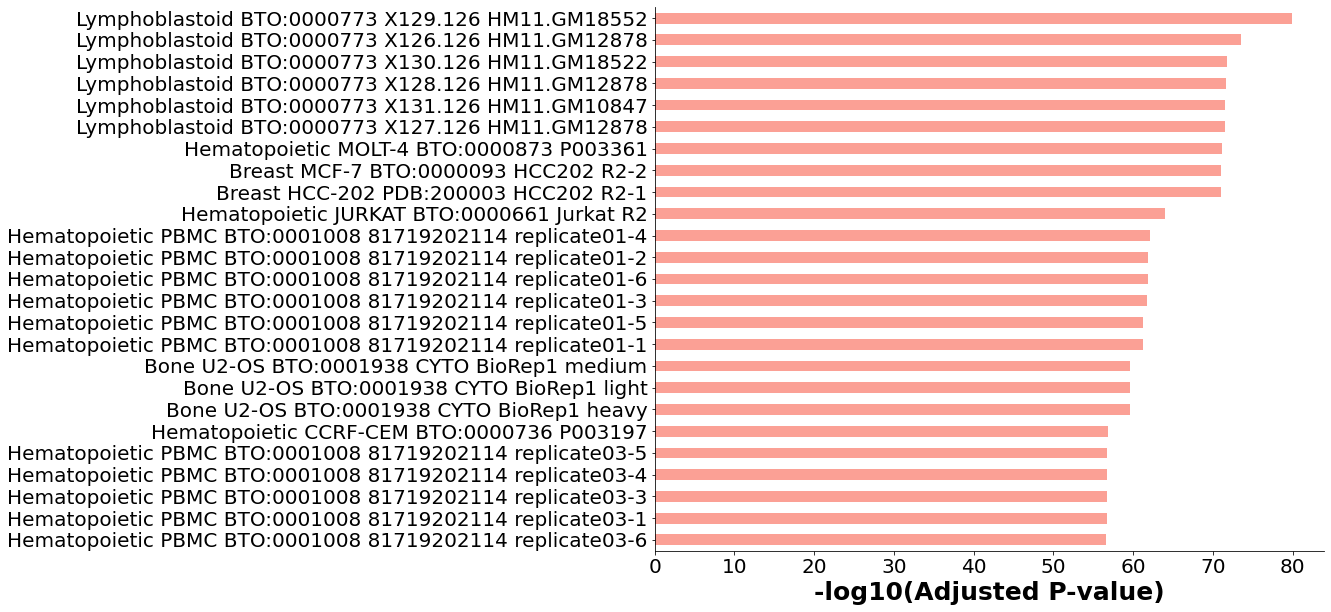

In [5]:
for gset in genesets:
    enr = gp.enrichr(gene_list=list(data.Names.dropna()), 
                   description="Lymphocytes",
                   gene_sets=gset,
                   outdir='/data/test/enrichr'
                )
    
    #as table:
    print(gset)
    #display(enr.res2d[['Term','Adjusted P-value']][0:20])
    enr.res2d[['Term','Adjusted P-value']][0:20].to_csv( 'data/AutoPOTS_forPRIDE/{0}.tsv'.format(gset), sep='\t')
    
    #as barplot
    

    barplot(enr.res2d, figsize=(12,10), top_term=25) #title=gset,
    #fig.figsize(16,12)
    
    plt.yticks(size=20) 
    plt.xticks(size = 20)
    plt.xlabel("-log10(Adjusted P-value)", size=25)
    
    plt.savefig('data/AutoPOTS_forPRIDE/{0}.png'.format(gset), bbox_inches='tight', dpi=300)
    plt.show()

To improve readability, we reformat the table.

In [6]:
import pandas as pd
results = pd.read_csv('data/AutoPOTS_forPRIDE/ProteomicsDB_2020.tsv', sep='\t', index_col=0)
    

In [7]:
results['Tissue Type'] = results['Term'].apply(lambda t: t.split(':')[0][:-4])
results['Cell Line ID'] = results['Term'].apply(lambda t: t.replace(t.split(':')[0][:-4], ''))


In [8]:
results[['Tissue Type','Cell Line ID','Adjusted P-value']].to_csv('data/AutoPOTS_forPRIDE/ProteomicsDB_2020.csv')